# Project introduction:
The Car dataset was used in the 1983 American Statistical Association Exposition. The data concerns city-cycle fuel consumption in miles per gallon, to be predicted in terms of 2 multivalued discrete and 4 continuous variables. 

Dataset: cars-dataset.csv

Attribute Information:

Car Name – Name of the car
Cyl – No of cylinders in the car – Multivalued discrete
Disp – Displacement – continuous
Hp – Horsepower – continuous
Wt – Weight – continuous
Acc – Accleration – continuous
Yr – Model of the car – Multivalued discrete

# Steps to follow:

EDA & Pre-processing (Make sure to remove all non-numeric entries from numeric columns) – 2.5 points

Use pair plot or scatter matrix to visualize how the different variables are related (Hint: The amount of Gaussian curves in the plot should give a visual identification of different clusters existing in the dataset) – 5 points

Use K Means or Hierarchical clustering to find out the optimal no of clusters in the data. Identify and separate the clusters (15 points)

Use linear regression model on different clusters separately and print the coefficients of the models individually (7.5 points)

In [203]:
# Numerical libraries
import numpy as np   

from sklearn.model_selection import train_test_split

# Import Linear Regression machine learning library
from sklearn.linear_model import LinearRegression
from sklearn.cluster import KMeans

# to handle data in form of rows and columns 
import pandas as pd    

# importing ploting libraries
import matplotlib.pyplot as plt   

#importing seaborn for statistical plots
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [204]:
# reading the CSV file into pandas dataframe
cars_df = pd.read_csv("cars_dataset.csv")
cars_df.shape

(398, 8)

In [205]:
cars_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 8 columns):
car name    398 non-null object
cyl         398 non-null int64
disp        398 non-null float64
hp          398 non-null object
wt          398 non-null int64
acc         398 non-null float64
yr          398 non-null int64
mpg         398 non-null float64
dtypes: float64(3), int64(3), object(2)
memory usage: 25.0+ KB


In [206]:
cars_df.head(3)

,car name,cyl,disp,hp,wt,acc,yr,mpg
0,chevrolet chevelle malibu,8,307.0,130,3504,12.0,70,18.0
1,buick skylark 320,8,350.0,165,3693,11.5,70,15.0
2,plymouth satellite,8,318.0,150,3436,11.0,70,18.0


In [207]:
cars_df.tail(3)

,car name,cyl,disp,hp,wt,acc,yr,mpg
395,dodge rampage,4,135.0,84,2295,11.6,82,32.0
396,ford ranger,4,120.0,79,2625,18.6,82,28.0
397,chevy s-10,4,119.0,82,2720,19.4,82,31.0


In [208]:
cars_df.dtypes

car name     object
cyl           int64
disp        float64
hp           object
wt            int64
acc         float64
yr            int64
mpg         float64
dtype: object

In [209]:
cars_df.describe().T

,count,mean,std,min,25%,50%,75%,max
cyl,398.0,5.454774,1.701004,3.0,4.000,4.0,8.000,8.0
disp,398.0,193.425879,104.269838,68.0,104.250,148.5,262.000,455.0
wt,398.0,2970.424623,846.841774,1613.0,2223.750,2803.5,3608.000,5140.0
acc,398.0,15.568090,2.757689,8.0,13.825,15.5,17.175,24.8
yr,398.0,76.010050,3.697627,70.0,73.000,76.0,79.000,82.0
mpg,398.0,23.514573,7.815984,9.0,17.500,23.0,29.000,46.6


#  horsepower is missing

In [210]:
print (cars_df.isna().sum())

car name    0
cyl         0
disp        0
hp          0
wt          0
acc         0
yr          0
mpg         0
dtype: int64


# Cleaning of the data

**Find out if there are null fields**


In [211]:
cars_df.isnull().sum()

car name    0
cyl         0
disp        0
hp          0
wt          0
acc         0
yr          0
mpg         0
dtype: int64

In [212]:
temp = pd.DataFrame(cars_df.hp.str.isdigit()) 

temp[temp['hp'] == False]

,hp
32,False
126,False
330,False
336,False
354,False
374,False


In [213]:
# Find '?' values in "hp" column
cars_df[cars_df['hp']=='?']

,car name,cyl,disp,hp,wt,acc,yr,mpg
32,ford pinto,4,98.0,?,2046,19.0,71,25.0
126,ford maverick,6,200.0,?,2875,17.0,74,21.0
330,renault lecar deluxe,4,85.0,?,1835,17.3,80,40.9
336,ford mustang cobra,4,140.0,?,2905,14.3,80,23.6
354,renault 18i,4,100.0,?,2320,15.8,81,34.5
374,amc concord dl,4,151.0,?,3035,20.5,82,23.0


**From above we see that, 6 records are there with '?' values in horsepower column.**

* we have two choices for '?' values:

    1. we have to remove those records from the data set.
    2. we can replace these '?' values with some central values.
    
    In this case we are replacing it with median.

In [214]:
cars_df = cars_df.replace('?',np.nan)

In [215]:
cars_df['hp'] = cars_df['hp'].astype('float64')


In [216]:
cars_df.describe()

,cyl,disp,hp,wt,acc,yr,mpg
count,398.000000,398.000000,392.000000,398.000000,398.000000,398.000000,398.000000
mean,5.454774,193.425879,104.469388,2970.424623,15.568090,76.010050,23.514573
std,1.701004,104.269838,38.491160,846.841774,2.757689,3.697627,7.815984
min,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,9.000000
25%,4.000000,104.250000,75.000000,2223.750000,13.825000,73.000000,17.500000
50%,4.000000,148.500000,93.500000,2803.500000,15.500000,76.000000,23.000000
75%,8.000000,262.000000,126.000000,3608.000000,17.175000,79.000000,29.000000
max,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,46.600000


In [217]:
# Treating missing values in horsepower with median
print ("Before missing value treatment: ")
print (cars_df.isna().sum())
print ("=======================================")
cars_df = cars_df.fillna(cars_df.median())
print ("After missing value treatment: ")
print (cars_df.isna().sum())

Before missing value treatment: 
car name    0
cyl         0
disp        0
hp          6
wt          0
acc         0
yr          0
mpg         0
dtype: int64
After missing value treatment: 
car name    0
cyl         0
disp        0
hp          0
wt          0
acc         0
yr          0
mpg         0
dtype: int64


In [218]:

cars_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 8 columns):
car name    398 non-null object
cyl         398 non-null int64
disp        398 non-null float64
hp          398 non-null float64
wt          398 non-null int64
acc         398 non-null float64
yr          398 non-null int64
mpg         398 non-null float64
dtypes: float64(4), int64(3), object(1)
memory usage: 25.0+ KB


In [219]:
# Dropping the car name column as it is not required for our analysis.
cars_df.drop(['car name'], axis=1, inplace=True)

# Use pair plot or scatter matrix to visualize how the different variables are related (Hint: The amount of Gaussian curves in the plot should give a visual identification of different clusters existing in the dataset) – 5 points

In [220]:
# This is done using scatter matrix function which creates a dashboard reflecting useful information about the dimensions
# The result can be stored as a .png file and opened in say, paint to get a larger view 


#cars_df_attr = cars_df.iloc[:, 0:7]
#cars_df_attr['dispercyl'] = cars_df_attr['disp'] / cars_df_attr['cyl']
#sns.pairplot(cars_df_attr, diag_kind='kde', hue = 'cyl')   # to plot density curve instead of histogram

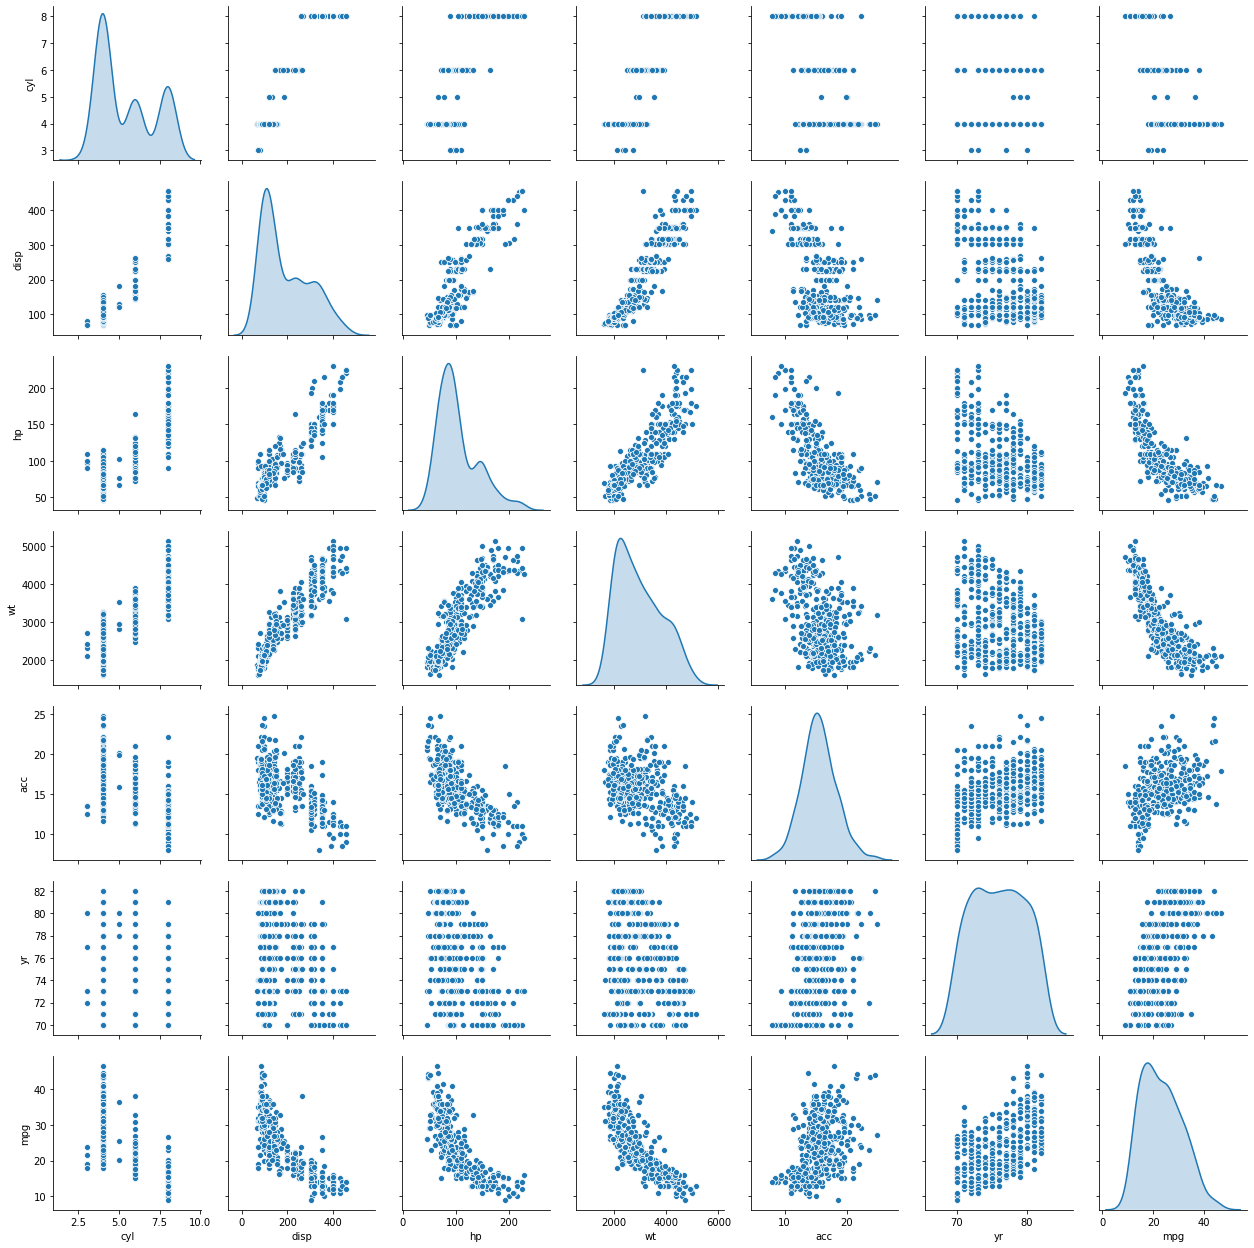

In [221]:
sns.pairplot(data=cars_df,diag_kind='kde')
plt.show()

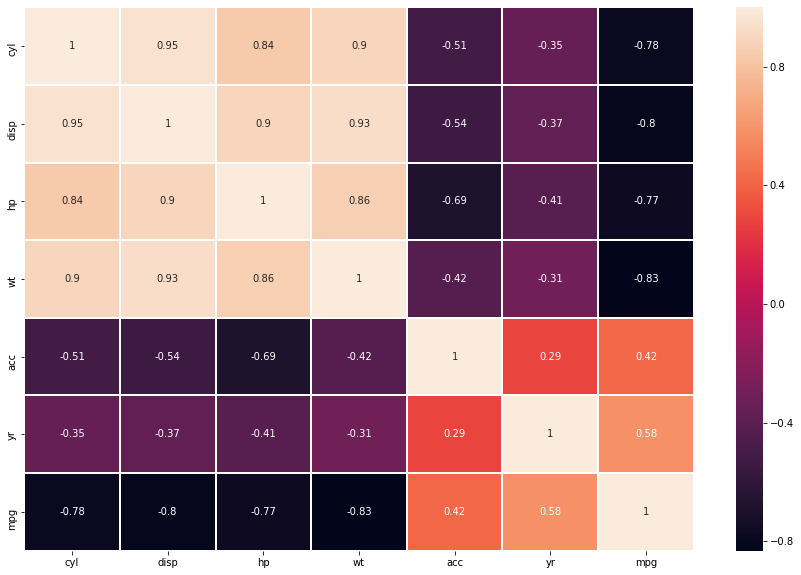

In [222]:
plt.subplots(figsize=(15,10))
sns.heatmap(cars_df.corr(), annot=True, linewidths=1)

In [223]:

CorrMat = cars_df.corr()
indices = np.where((CorrMat < 0.1) & (CorrMat > -0.1))
indices = [(CorrMat.index[x], CorrMat.columns[y]) for x, y in zip(*indices) if x != y and x < y]
if len(indices) == 0:
    print ("All the attributes have some corrrelation between them.\n")
else:
    print ("There is no significant correlation between the following attributes: ")
    print ("------------------------------------------------------------------------")
    print(indices)
    print("====================================================================")
    indices = np.where((CorrMat < 0.1) & (CorrMat > -0.1))
    indices = [(CorrMat.index[x]) for x, y in zip(*indices) if x != y and x < y and y == -1]
    if len(indices) == 0:
        print ('All the attributes have some corrrelation with mpg.\n')
    else:
        print ("There is no significant correlation between mpg and the following attributes: \n", indices)

All the attributes have some corrrelation between them.



In [224]:
indices = np.where(CorrMat > 0.1)
indices = [(CorrMat.index[x], CorrMat.columns[y]) for x, y in zip(*indices) if x != y and x < y]
print ("There is significant positive correlation between the following attributes: ")
print ("------------------------------------------------------------------------")
print(indices)
print("====================================================================")
indices = np.where(CorrMat > 0.1)
indices = [(CorrMat.index[x]) for x, y in zip(*indices) if x != y and x < y and y == 6]
print ("\nThere is significant positive correlation between mpg and the following attributes: \n", indices)

There is significant positive correlation between the following attributes: 
------------------------------------------------------------------------
[('cyl', 'disp'), ('cyl', 'hp'), ('cyl', 'wt'), ('disp', 'hp'), ('disp', 'wt'), ('hp', 'wt'), ('acc', 'yr'), ('acc', 'mpg'), ('yr', 'mpg')]

There is significant positive correlation between mpg and the following attributes: 
 ['acc', 'yr']


In [225]:

indices = np.where(CorrMat < -0.1)
indices = [(CorrMat.index[x], CorrMat.columns[y]) for x, y in zip(*indices) if x != y and x < y]
print ("There is significant negative correlation between the following attributes: ")
print ("------------------------------------------------------------------------")
print(indices)
print("====================================================================")
indices = np.where(CorrMat < -0.1)
indices = [(CorrMat.index[x]) for x, y in zip(*indices) if x != y and x < y and y == 6]

if len(indices) == 0:
    print ("\nPersonal Loan do not have negative correlation with any attributes.")
else:
    print ("\nThere is significant negative correlation between mpg and the following attributes: \n", indices)

There is significant negative correlation between the following attributes: 
------------------------------------------------------------------------
[('cyl', 'acc'), ('cyl', 'yr'), ('cyl', 'mpg'), ('disp', 'acc'), ('disp', 'yr'), ('disp', 'mpg'), ('hp', 'acc'), ('hp', 'yr'), ('hp', 'mpg'), ('wt', 'acc'), ('wt', 'yr'), ('wt', 'mpg')]

There is significant negative correlation between mpg and the following attributes: 
 ['cyl', 'disp', 'hp', 'wt']


# Observations:

**Have listed the correlation between attributes in the above outputs.**

**As from the KDE pair plot it is evident that there are atleast 3 clusters.**




# Standardization

In [226]:
from scipy.stats import zscore

cars_df[["hp"]] =cars_df[["hp"]].apply(pd.to_numeric)
cars_df.info()
cars_df_z = cars_df.apply(zscore)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 7 columns):
cyl     398 non-null int64
disp    398 non-null float64
hp      398 non-null float64
wt      398 non-null int64
acc     398 non-null float64
yr      398 non-null int64
mpg     398 non-null float64
dtypes: float64(4), int64(3)
memory usage: 21.8 KB


In [227]:
cars_df_z.head()

,cyl,disp,hp,wt,acc,yr,mpg
0,1.498191,1.090604,0.673118,0.630870,-1.295498,-1.627426,-0.706439
1,1.498191,1.503514,1.589958,0.854333,-1.477038,-1.627426,-1.090751
2,1.498191,1.196232,1.197027,0.550470,-1.658577,-1.627426,-0.706439
3,1.498191,1.061796,1.197027,0.546923,-1.295498,-1.627426,-0.962647
4,1.498191,1.042591,0.935072,0.565841,-1.840117,-1.627426,-0.834543


In [228]:
  # Remove  "yr" columns
cars_df_z.pop('yr')

array = cars_df_z.values

In [229]:
array

array([[ 1.49819126,  1.0906037 ,  0.67311762,  0.63086987, -1.29549834,
        -0.7064387 ],
       [ 1.49819126,  1.5035143 ,  1.58995818,  0.85433297, -1.47703779,
        -1.09075062],
       [ 1.49819126,  1.19623199,  1.19702651,  0.55047045, -1.65857724,
        -0.7064387 ],
       ...,
       [-0.85632057, -0.56103873, -0.53187283, -0.79858454, -1.4407299 ,
         1.08701694],
       [-0.85632057, -0.70507731, -0.66285006, -0.40841088,  1.10082237,
         0.57460104],
       [-0.85632057, -0.71467988, -0.58426372, -0.29608816,  1.39128549,
         0.95891297]])

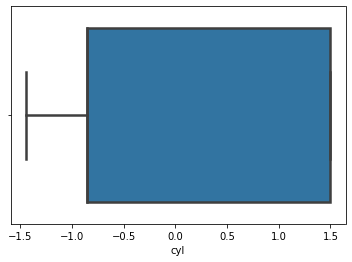

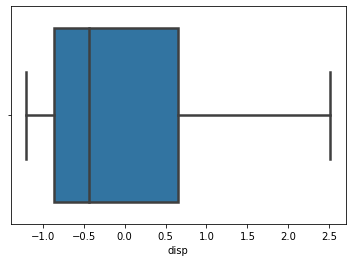

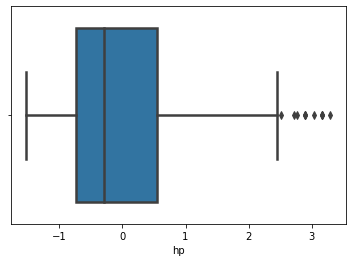

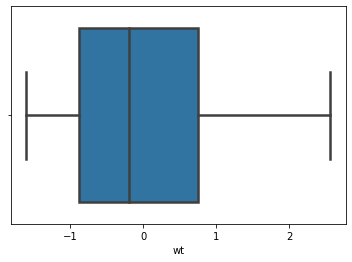

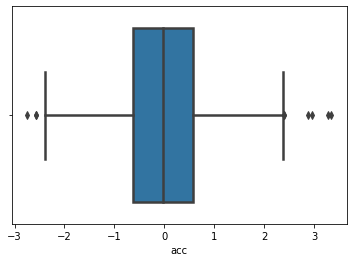

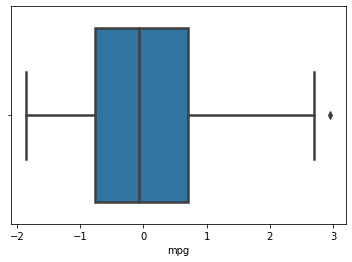

In [230]:

# Let us check for outliers now
#cars_df_z.boxplot()

for i, col in enumerate(cars_df_z):
    plt.figure(i)
    sns.boxplot(cars_df_z[col],linewidth=2.5)

# Use K Means or Hierarchical clustering to find out the optimal no of clusters in the data. Identify and separate the clusters (15 points)

# Info:

**As from the KDE pair plot it is evident that there are atleast  3 clusters, lets find out the optimal number of clusters between 2 to 8.**


In [231]:
from sklearn.cluster import KMeans

cluster_range = range( 2, 8)
cluster_errors = []
for num_clusters in cluster_range:
  clusters = KMeans( num_clusters, n_init = 8, random_state=1)
  clusters.fit(cars_df_z)
  labels = clusters.labels_
  centroids = clusters.cluster_centers_
  cluster_errors.append( clusters.inertia_ )

clusters_df = pd.DataFrame( { "num_clusters":cluster_range, "cluster_errors": cluster_errors } )
clusters_df

,num_clusters,cluster_errors
0,2,944.289955
1,3,609.265388
2,4,492.519413
3,5,423.323816
4,6,366.479312
5,7,333.866105


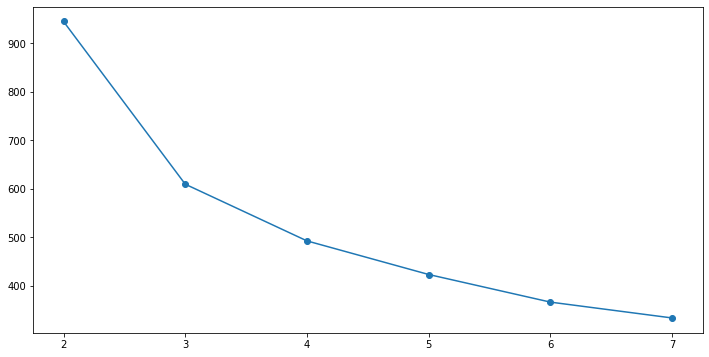

In [232]:

# Elbow plot

plt.figure(figsize=(12,6))
plt.plot( clusters_df.num_clusters, clusters_df.cluster_errors, marker = "o" )

# Observations:
From the above elbow plot it is evident that there are 4 good clusters.

In [233]:

# Seperating the clusters.
cluster = KMeans( n_clusters = 4, random_state = 1 )
cluster.fit(cars_df_z)
cars_df_z_copy = cars_df_z.copy(deep = True)  # Creating a mirror copy for later re-use instead of building repeatedly

In [234]:

# Getting the number of values in each cluster.
from collections import Counter, defaultdict
print (Counter(cluster.labels_))

Counter({0: 133, 1: 97, 3: 87, 2: 81})


In [235]:
# Getting the centroids of the clusters.
centroids = cluster.cluster_centers_
#centroids

In [236]:

centroid_df = pd.DataFrame(centroids, columns = list(cars_df_z) )
prediction=cluster.predict(cars_df_z)
cars_df_z["GROUP"] = prediction     # Creating a new column "GROUP" which will hold the cluster id of each record
cars_df_z.sample(10)

,cyl,disp,hp,wt,acc,mpg,GROUP
201,0.320935,0.543257,0.149209,0.797580,0.229433,-0.642387,3
13,1.498191,2.511784,3.161685,0.136650,-2.021656,-1.218855,1
28,1.498191,1.061796,2.323431,2.082789,1.064514,-1.859374,1
341,0.320935,-0.196141,0.149209,-0.290176,-1.077651,-0.001867,3
29,-0.856321,-0.925936,-0.427091,-0.993671,-0.387801,0.446497,0
127,0.320935,0.370411,-0.112746,-0.082084,0.156817,-0.578335,3
393,-0.856321,-0.513026,-0.479482,-0.213324,0.011586,0.446497,0
390,-0.856321,-0.474616,-0.217527,-0.361117,-0.605648,1.087017,0
269,-0.856321,-0.849116,-0.767632,-0.875437,-0.387801,0.946103,0
172,-0.856321,-0.993154,-0.872414,-0.883713,0.338357,0.190289,0


# Now that we have done the below...
--> seperated the clusters and got the counts in each clusters.
--> Got the centroids of each cluster.
--> Given the cluster ID for each row of the dataframe.
Now moving on to visualize the clusters.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000025A7DB30E10>,
      dtype=object)

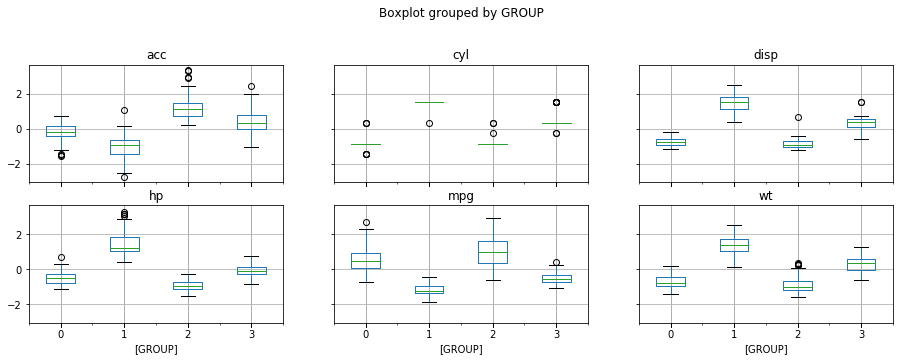

In [237]:
cars_df_z.boxplot(by = 'GROUP',  layout=(4,3), figsize=(15, 10))

# Observations:
**There are outliers in horsepower, accelaration, displacement, mpg**


# There are many outliers on each dimension  (indicated by the black circles)
# Spread of data on each dimension (indivated by the whiskers is long ... due to the outliers)
# If the outliers are addressed, the clusters will overlap much less than right now


In [238]:

# Addressing outliers at group level

data = cars_df_z

def replace(group):
    median, std = group.median(), group.std()  #Get the median and the standard deviation of every group 
    outliers = (group - median).abs() > 2*std # Subtract median from every member of each group. Take absolute values > 2std
    group[outliers] = group.median()
    return group

data_corrected = (data.groupby('GROUP').transform(replace)) 
concat_data = data_corrected.join(pd.DataFrame(cars_df_z['GROUP']))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000025A01A05898>,
      dtype=object)

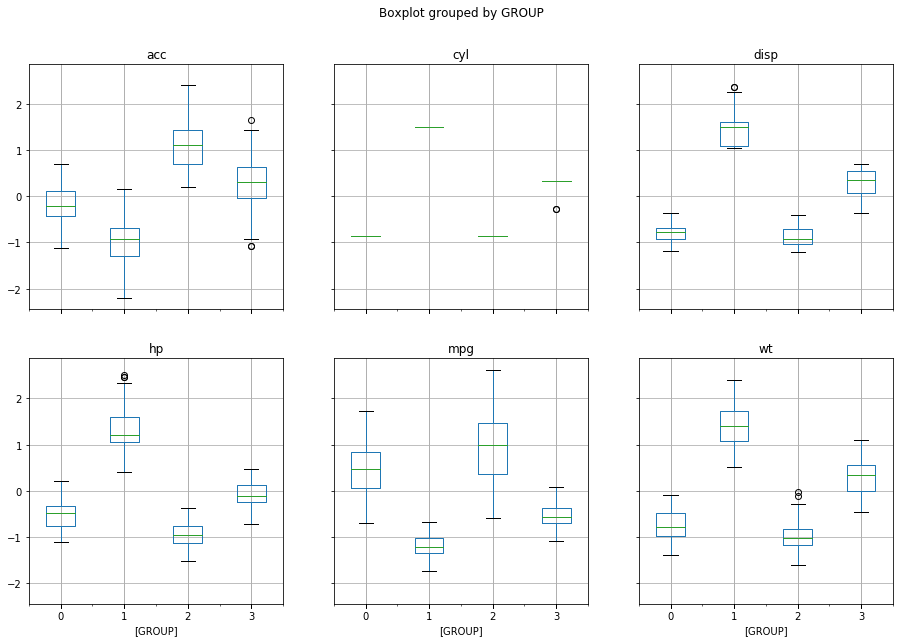

In [239]:
concat_data.boxplot(by = 'GROUP', layout=(2,3), figsize=(15, 10))

# Note: When we remove outliers and replace with median or mean, the distribution shape changes, the standard deviation becomes tighter creating new outliers. The new outliers would be much closer to the centre than original outliers so we accept them without modifying them.

In [240]:
df_GBSplit = cars_df_z.groupby('GROUP')
#[df_GBSplit.get_group(x) for x in df_GBSplit.groups]

Group = []
Shape = []
for x in df_GBSplit.groups:
    Group.append(x)
    Shape.append(df_GBSplit.get_group(x).shape)

GroupDetails_df = pd.DataFrame( { "Group":Group, "Shape": Shape} )
GroupDetails_df 

,Group,Shape
0,0,"(133, 7)"
1,1,"(97, 7)"
2,2,"(81, 7)"
3,3,"(87, 7)"


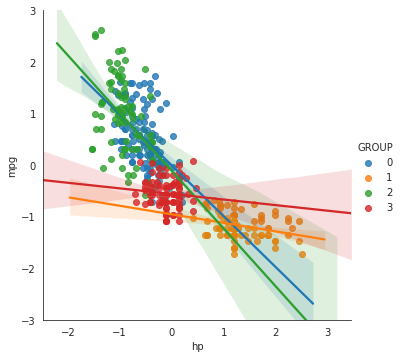

In [241]:
# mpg Vs hp

var = 'hp'

with sns.axes_style("white"):
    plot = sns.lmplot(var,'mpg',data=concat_data,hue='GROUP')
plot.set(ylim = (-3,3))

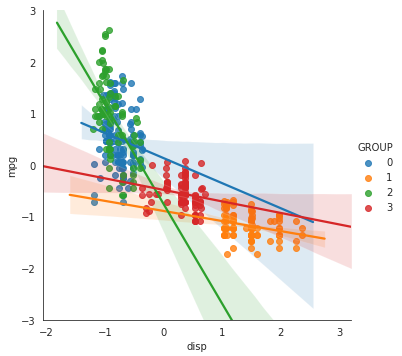

In [242]:
# mpg Vs disp
var = 'disp'
with sns.axes_style("white"):
    plot = sns.lmplot(var,'mpg',data=concat_data,hue='GROUP')
plot.set(ylim = (-3,3))

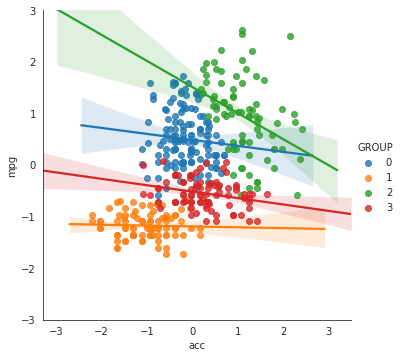

In [243]:
# mpg Vs acc
var = 'acc'
with sns.axes_style("white"):
    plot = sns.lmplot(var,'mpg',data=concat_data,hue='GROUP')
plot.set(ylim = (-3,3))

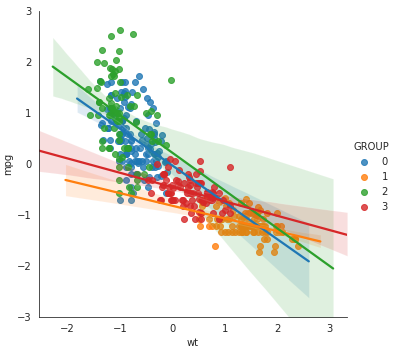

In [244]:
# mpg Vs wt
var = 'wt'
with sns.axes_style("white"):
    plot = sns.lmplot(var,'mpg',data=concat_data,hue='GROUP')
plot.set(ylim = (-3,3))

# 4. Use linear regression model on different clusters separately and print the coefficients of the models individually (7.5 points)

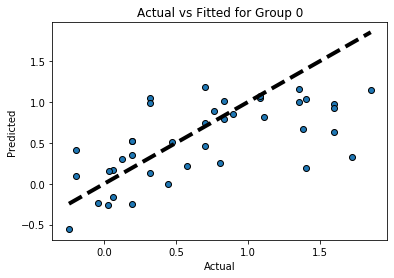

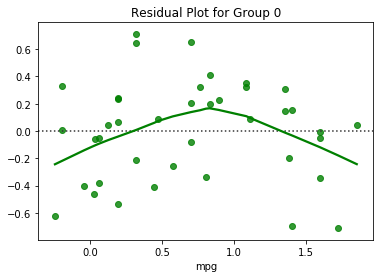

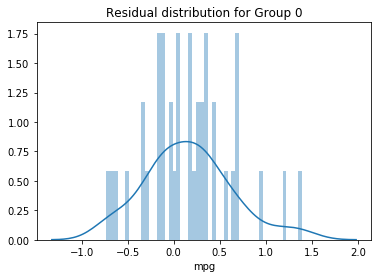

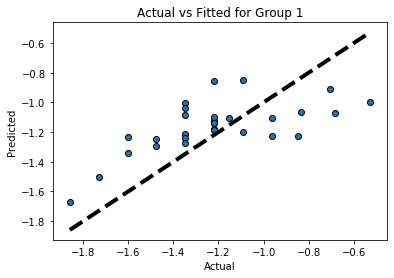

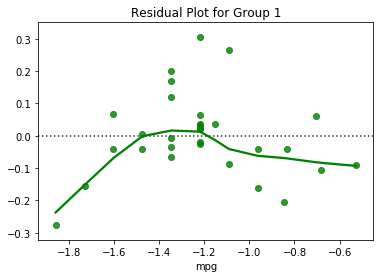

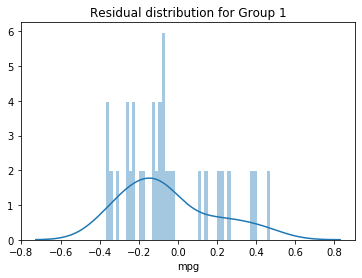

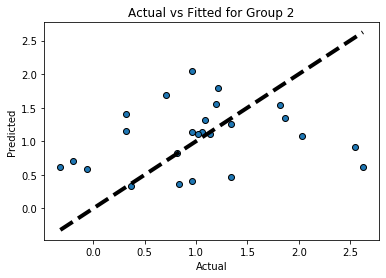

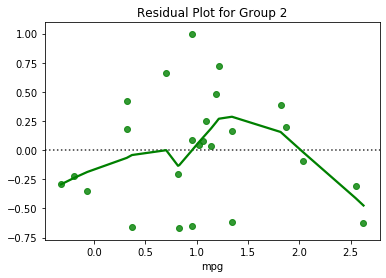

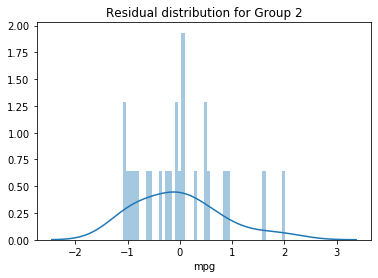

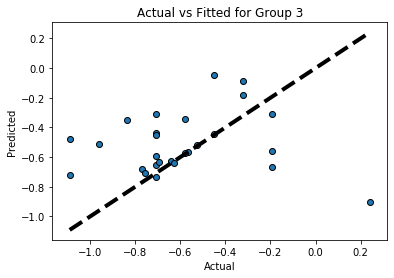

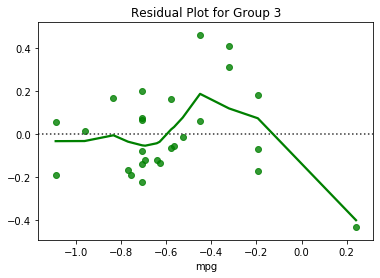

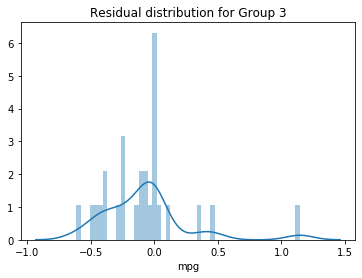

In [245]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

Group = []
Coeff = []
Intercept = []

#Train_Accuracy = []
#Test_Accuracy = []

RSquared = []
RMSE = []
i = 0

for x in df_GBSplit.groups:
    df = df_GBSplit.get_group(x)
    X = df.drop(['mpg','GROUP'], axis=1)
    Y = df['mpg']
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=.3, random_state=7)
    lm = LinearRegression()
    lm.fit(X_train,Y_train)
    predictions = lm.predict(X_test)
    Group.append(x)
    Coeff.append(lm.coef_)
    Intercept.append(lm.intercept_)
    
    #Train_Accuracy.append(lm.score(X_train,Y_train))
    #Test_Accuracy.append(lm.score(X_test,Y_test))
    
    RSquared.append(metrics.r2_score(Y_test,predictions))
    RMSE.append(np.sqrt(metrics.mean_squared_error(Y_test, predictions)))

    plt.figure(i)
    plt.scatter(Y_test, predictions, edgecolors=(0, 0, 0))
    plt.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()], 'k--', lw=4)
    plt.title('Actual vs Fitted for Group ' + str(x))
    plt.xlabel('Actual')
    plt.ylabel('Predicted')
    i = i + 1

    plt.figure(i)
    plt.title('Residual Plot for Group ' + str(x))
    sns.residplot(Y_test, predictions, lowess=True, color="g")
    i = i + 1

    plt.figure(i)
    plt.title('Residual distribution for Group ' + str(x))
    sns.distplot((Y_test-predictions),bins=50);
    i = i + 1

In [246]:
Coeff_df = pd.DataFrame(Coeff, columns = X_train.columns)
Coeff_df.columns = [str(col) + '_Coeff' for col in Coeff_df.columns]
Group_df = pd.DataFrame( { "Group":Group } )
Intercept_df = pd.DataFrame( { "Intercept":Intercept } )

#Train_Accuracy_df = pd.DataFrame( { "Train_Accuracy":Train_Accuracy } )
#Test_Accuracy_df = pd.DataFrame( { "Test_Accuracy":Test_Accuracy })

RSquared_df = pd.DataFrame( { "RSquared":RSquared })
RMSE_df = pd.DataFrame( { "RMSE":RMSE })

Coeff_df['Intercept'] = Intercept_df['Intercept'].values

#Coeff_df['Train_Accuracy'] = Train_Accuracy_df['Train_Accuracy'].values
#Coeff_df['Test_Accuracy'] = Test_Accuracy_df['Test_Accuracy'].values

Coeff_df['RSquared'] = RSquared_df['RSquared'].values
Coeff_df['RMSE'] = RMSE_df['RMSE'].values
Coeff_df['GROUP'] = Group_df['Group'].values
Cols = Coeff_df.columns.tolist()
Cols = Cols[-1:] + Cols[:-1]

#Coeff_df = pd.concat([Group_df, Train_Accuracy_df, Test_Accuracy_df, Intercept_df, Coeff_df])

Coeff_df = Coeff_df[Cols]
Coeff_df

,GROUP,cyl_Coeff,disp_Coeff,hp_Coeff,wt_Coeff,acc_Coeff,Intercept,RSquared,RMSE
0,0,0.795413,0.381656,-1.054628,-0.420812,-0.299552,0.616898,0.317409,0.495495
1,1,-0.344252,0.068177,-0.204128,-0.136895,-0.114478,-0.347734,0.386527,0.234186
2,2,1.017900,-0.463678,-1.233252,-0.004399,-0.456176,0.854844,-0.171733,0.799284
3,3,0.482215,-0.064922,0.124708,-0.508761,0.099033,-0.517773,-0.476406,0.347334


In [247]:
# Copy all the predictor variables into X dataframe. Since 'mpg' is dependent variable drop it
X = cars_df_z.drop('mpg', axis=1)

# Copy the 'mpg' column alone into the y dataframe. This is the dependent variable
y = cars_df_z[['mpg']]


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=7)

regression_model = LinearRegression()
regression_model.fit(X_train, y_train)

reg_train_score = regression_model.score(X_train, y_train)
print("Train Score:",reg_train_score )

Train Score: 0.7366611722012366


In [248]:
reg_test_score =regression_model.score(X_test, y_test)
print("Test Score:",reg_test_score )

Test Score: 0.6413592170509734


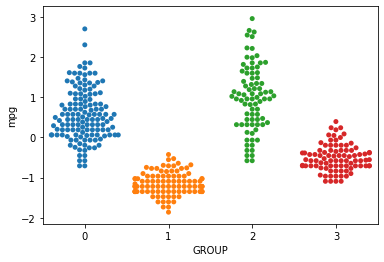

In [249]:

sns.swarmplot(cars_df_z.GROUP,cars_df_z.mpg)

# Observation:

* Loaded the cars data set and looked at the distribution of data
* EDA & Pre-processing is done and the non-numeric data (car name) is removed
* Data cleaning is done.  '?' is the fiels hp is replaced with median. 
* Used pair plot  to visualize how the different variables are related 
* Correlation between attributes are visualised using head map and their relation are found out.
* Data standadisation are done
* Using elbow plot observed No: of clusters to be 4
* Seperated the clusters and got the counts in each clusters. --> Got the centroids of each cluster. --> 
* Given the cluster ID for each row of the dataframe. 
* visualized the clusters.
* Used linear regression model on different clusters separately and printed the coefficients of the models individually.
* Overall train and test score is calculated using linear regression